# **Curso Udemy Machine Learning**

In [2]:
#Ativar o drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# Bibliotecas
import pandas as pd
import numpy as np

# Bibliotecas graficas
import matplotlib.pyplot as plt
import seaborn as sns

# Ignorar avisos
import warnings
warnings.filterwarnings('ignore')

# Configuração no Matplotlib
plt.rcParams['figure.figsize'] = (15, 6)  # Tamanho dos gráficos
plt.style.use('seaborn-darkgrid') # Estilo dos gráficos



In [4]:
df = pd.read_csv('/content/drive/MyDrive/curso_udemy_ml/house_data.csv')


# **Exploração dos dados**

In [5]:
df.shape

(10692, 13)

In [6]:
# Verificar a base
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [7]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

- Entendendo as variáveis:

    - 'city' = cidade do imóvel
    - 'area' = área do imóvel em m^2
    - 'rooms' = n° de quartos
    - 'bathroom' = n° de banheiros
    - 'parking spaces' = n° de vagas de garagem
    - 'floor' = andar do imóvel
    - 'animal' = se aceita animal
    - 'furniture' = se é mobiliado
    - 'hoa (R$)' = taxa de condomínio
    - 'rent amount (R$)' = valor do aluguel
    - 'property tax (R$)' = valor do iptu
    - 'fire insurance (R$)' = valor do seguro de incêndio
    - 'total (R$)' = valor final do imóvel




Pergunta que será respondida:


        Quanto vale o aluguel da sua casa? 



In [8]:
# Retirar colunas que são desnecessárias
# seguro incêndio e valor final

df = df.drop(columns=['fire insurance (R$)','total (R$)'])
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25


In [9]:
df.shape

(10692, 11)

In [10]:
# Somar os campos vazios
df.isnull().sum()

# Se tivesse valores desordenados --> df.isnull().sum().sort_values(ascending=False)

city                 0
area                 0
rooms                0
bathroom             0
parking spaces       0
floor                0
animal               0
furniture            0
hoa (R$)             0
rent amount (R$)     0
property tax (R$)    0
dtype: int64

In [11]:
# Campos unicos
df.nunique()

city                    5
area                  517
rooms                  11
bathroom               10
parking spaces         11
floor                  35
animal                  2
furniture               2
hoa (R$)             1679
rent amount (R$)     1195
property tax (R$)    1243
dtype: int64

In [12]:
# Tipos das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   city               10692 non-null  object
 1   area               10692 non-null  int64 
 2   rooms              10692 non-null  int64 
 3   bathroom           10692 non-null  int64 
 4   parking spaces     10692 non-null  int64 
 5   floor              10692 non-null  object
 6   animal             10692 non-null  object
 7   furniture          10692 non-null  object
 8   hoa (R$)           10692 non-null  int64 
 9   rent amount (R$)   10692 non-null  int64 
 10  property tax (R$)  10692 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 919.0+ KB


In [13]:
# Tipos de colunas
df.dtypes.value_counts()

int64     7
object    4
dtype: int64

## Exploração Analítica (EDA)

In [14]:
# Filtrar os tipos de colunas

colunas_categoricas = df.columns[df.dtypes == object]
colunas_numericas = df.columns[df.dtypes != object]

colunas_categoricas, colunas_numericas

(Index(['city', 'floor', 'animal', 'furniture'], dtype='object'),
 Index(['area', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)',
        'rent amount (R$)', 'property tax (R$)'],
       dtype='object'))

In [15]:
# Análise das Colunas Categóricas 

for coluna in colunas_categoricas:

  # Fazendo a análise
  analise = df[coluna].value_counts(normalize=True)* 100

  # Imprimindo
  print(coluna, '\n', analise, '\n')
  

city 
 São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: city, dtype: float64 

floor 
 -      23.017209
1      10.110363
2       9.212495
3       8.707445
4       6.995885
5       5.611672
6       5.041152
7       4.648335
8       4.582866
9       3.451178
10      3.338945
11      2.833895
12      2.403666
13      1.870557
14      1.589974
15      1.374860
16      1.019454
17      0.897868
18      0.701459
19      0.495698
20      0.411523
21      0.392817
25      0.233820
23      0.233820
22      0.224467
26      0.187056
24      0.177703
27      0.074822
28      0.056117
29      0.046764
32      0.018706
35      0.009353
46      0.009353
301     0.009353
51      0.009353
Name: floor, dtype: float64 

animal 
 acept        77.777778
not acept    22.222222
Name: animal, dtype: float64 

furniture 
 not furnished    75.626637
furnished        24.373363
Name: furniture, dtype: float64 



In [16]:
# Correção dos dados

# Ajustando o andar 
df.loc[df['floor'] == '301']


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
2562,Belo Horizonte,80,3,2,2,301,acept,not furnished,750,2600,164


In [17]:
df.iloc[2562,5] = '0'
df.iloc[2562]

city                 Belo Horizonte
area                             80
rooms                             3
bathroom                          2
parking spaces                    2
floor                             0
animal                        acept
furniture             not furnished
hoa (R$)                        750
rent amount (R$)               2600
property tax (R$)               164
Name: 2562, dtype: object

In [18]:
# Ajustar o '-'
df['floor'] = df['floor'].apply(lambda x: 0 if x == '-' else x)

In [19]:
# Transformar em numerico
df['floor'] = pd.to_numeric(df['floor'])

In [20]:
# Análise das Colunas Categóricas 

for coluna in colunas_categoricas:

  # Fazendo a análise
  analise = df[coluna].value_counts(normalize=True)* 100

  # Imprimindo
  print(coluna, '\n', analise, '\n')
  

city 
 São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: city, dtype: float64 

floor 
 0     23.026562
1     10.110363
2      9.212495
3      8.707445
4      6.995885
5      5.611672
6      5.041152
7      4.648335
8      4.582866
9      3.451178
10     3.338945
11     2.833895
12     2.403666
13     1.870557
14     1.589974
15     1.374860
16     1.019454
17     0.897868
18     0.701459
19     0.495698
20     0.411523
21     0.392817
25     0.233820
23     0.233820
22     0.224467
26     0.187056
24     0.177703
27     0.074822
28     0.056117
29     0.046764
32     0.018706
35     0.009353
46     0.009353
51     0.009353
Name: floor, dtype: float64 

animal 
 acept        77.777778
not acept    22.222222
Name: animal, dtype: float64 

furniture 
 not furnished    75.626637
furnished        24.373363
Name: furniture, dtype: float64 



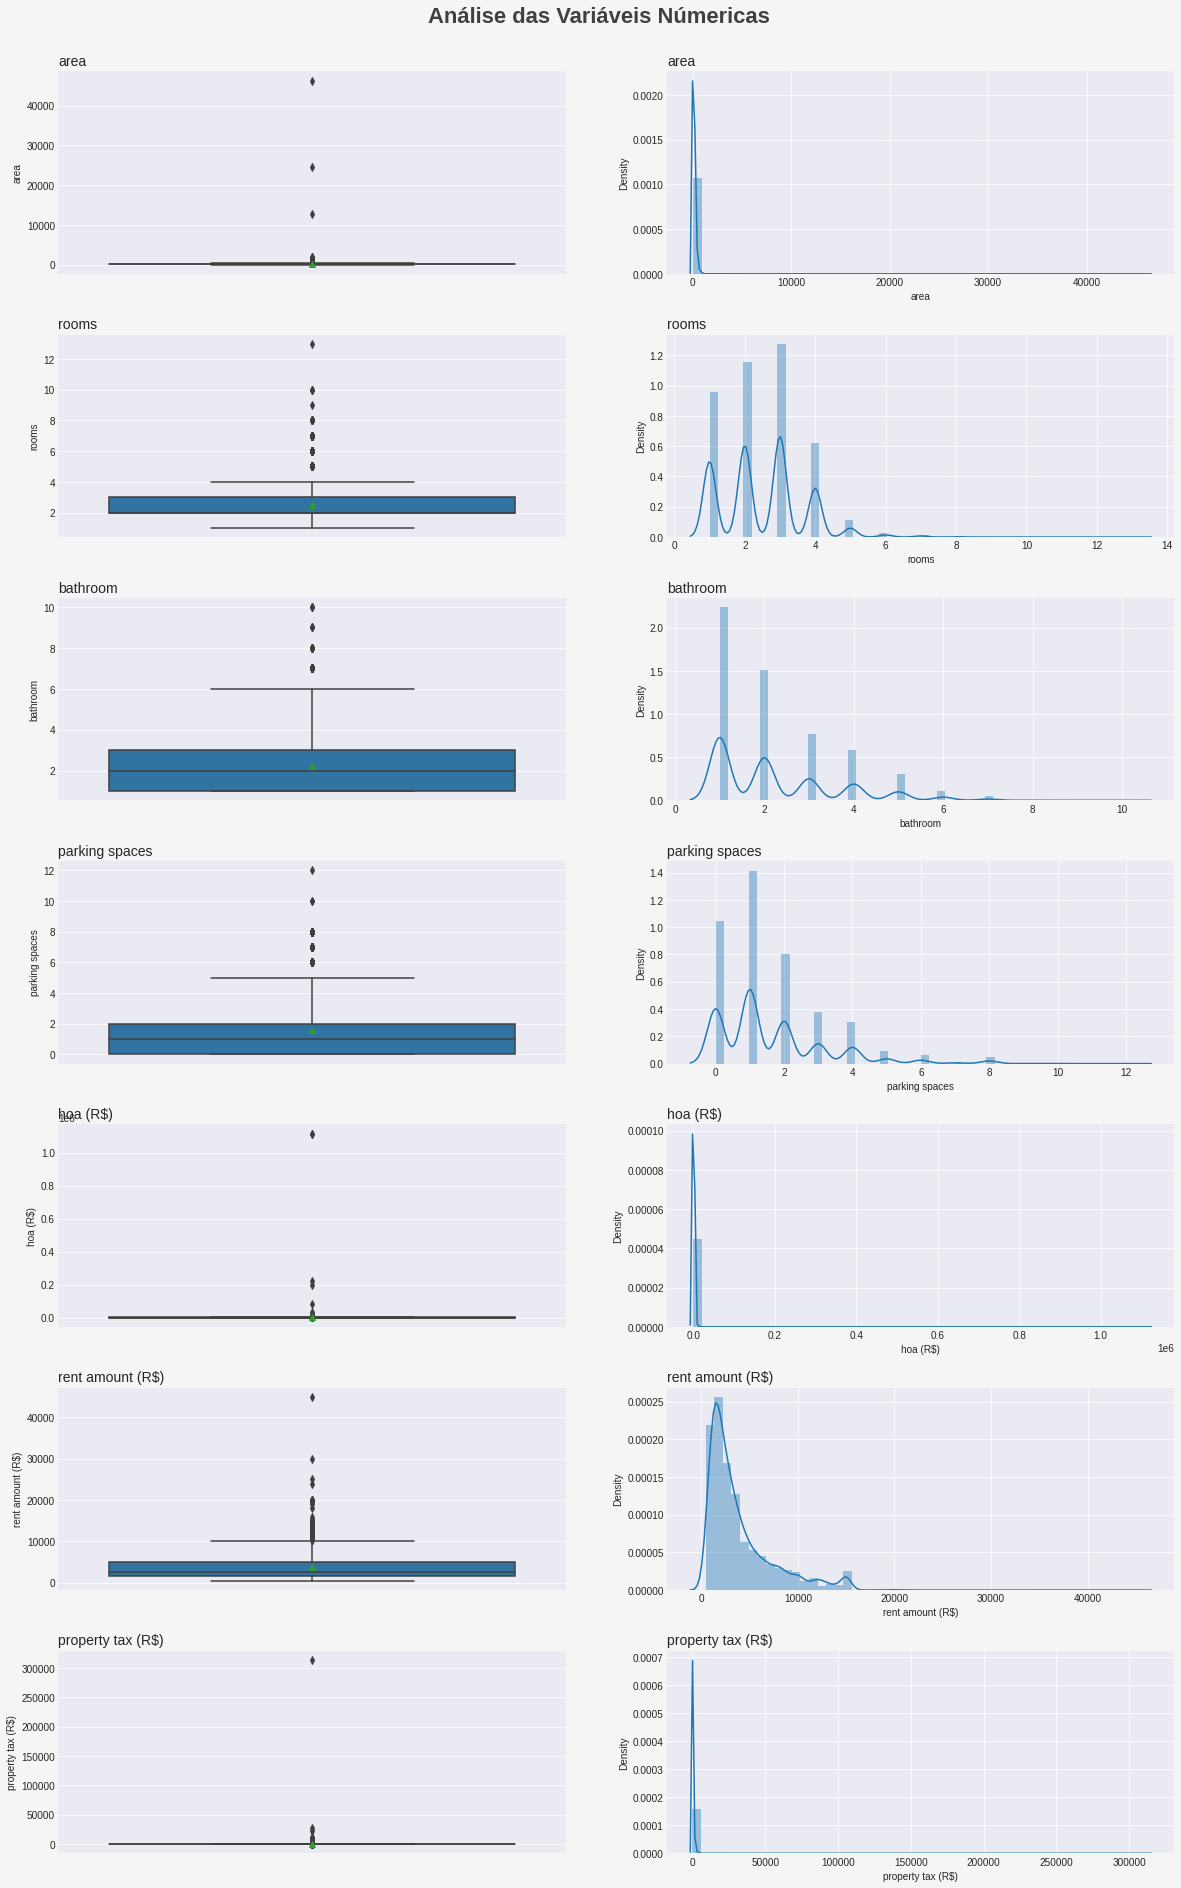

In [21]:
# Grid - Gráficos das variáveis númericas

# Tamanho
Figura, Eixo = plt.subplots(figsize=(20,30))

# Cor de fundo
cor_fundo = '#f5f5f5'
Figura.set_facecolor(cor_fundo)

# Paleta de Cores
paleta_cores = sns.color_palette('flare', len(colunas_categoricas)*2)

# Título
plt.suptitle('Análise das Variáveis Númericas', fontsize=22, color = '#404040', fontweight = 600)

# Estrutura
linhas = 7 # Todas as variaveis numericas 
colunas = 2 # duas informações (boxplot e displot)
posicao = 1 # posição inicial do grid

# Loop para plotar os gráficos
for coluna in colunas_numericas:
  # Plot no grid -- boxplot
  plt.subplot(linhas, colunas, posicao)
  # Titulo
  plt.title(f'{coluna}', loc='left', fontsize=14, fontweight= 200)
  
  # Plot
  sns.boxplot(data=df, y=coluna, showmeans=True)


  # Mudar a posição
  posicao += 1


  # Plot no grid -- distplot
  plt.subplot(linhas, colunas, posicao)
  
  # Titulo
  plt.title(f'{coluna}', loc='left', fontsize=14, fontweight= 200)
  

  # Plot
  sns.distplot(df[coluna])
  
  # Mudar a posição
  posicao += 1



# Ajuste de Grid
plt.subplots_adjust(top=0.95, hspace=0.3)


## Eng Features


### Ajuste das colunas categoricas

In [22]:
colunas_categoricas

Index(['city', 'floor', 'animal', 'furniture'], dtype='object')

In [23]:
df['animal']

0            acept
1            acept
2            acept
3            acept
4        not acept
           ...    
10687    not acept
10688        acept
10689    not acept
10690        acept
10691        acept
Name: animal, Length: 10692, dtype: object

In [24]:
# Transformar para numerica
df['animal'] = df['animal'].map({'acept':1, 'not acept':0})
df['animal']

0        1
1        1
2        1
3        1
4        0
        ..
10687    0
10688    1
10689    0
10690    1
10691    1
Name: animal, Length: 10692, dtype: int64

In [25]:
df['furniture']

0            furnished
1        not furnished
2        not furnished
3        not furnished
4        not furnished
             ...      
10687        furnished
10688    not furnished
10689        furnished
10690        furnished
10691    not furnished
Name: furniture, Length: 10692, dtype: object

In [26]:
# Transformar para numerica
df['furniture'] = df['furniture'].map({'furnished':1, 'not furnished':0})
df['furniture']

0        1
1        0
2        0
3        0
4        0
        ..
10687    1
10688    0
10689    1
10690    1
10691    0
Name: furniture, Length: 10692, dtype: int64

In [27]:
# Filtrar a cidade de SP --> MVP

filtro_sp = df.loc[df['city'] == 'São Paulo']
filtro_sp

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750
4,São Paulo,25,1,1,0,1,0,0,0,800,25
5,São Paulo,376,3,3,7,0,1,0,0,8000,834
7,São Paulo,213,4,4,4,4,1,0,2254,3223,1735
...,...,...,...,...,...,...,...,...,...,...,...
10683,São Paulo,280,4,4,2,5,1,0,4200,4000,1042
10685,São Paulo,83,3,2,2,11,1,0,888,7521,221
10686,São Paulo,150,3,3,2,8,0,1,0,13500,0
10688,São Paulo,285,4,4,4,17,1,0,3100,15000,973


In [28]:
#Retirar  a coluna cidade
filtro_sp.drop(columns=['city'], inplace=True)
filtro_sp

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,70,2,1,1,7,1,1,2065,3300,211
1,320,4,4,0,20,1,0,1200,4960,1750
4,25,1,1,0,1,0,0,0,800,25
5,376,3,3,7,0,1,0,0,8000,834
7,213,4,4,4,4,1,0,2254,3223,1735
...,...,...,...,...,...,...,...,...,...,...
10683,280,4,4,2,5,1,0,4200,4000,1042
10685,83,3,2,2,11,1,0,888,7521,221
10686,150,3,3,2,8,0,1,0,13500,0
10688,285,4,4,4,17,1,0,3100,15000,973


### Separar os dados

In [29]:
caracteristicas = filtro_sp.drop(columns=['rent amount (R$)'])
previsor = filtro_sp['rent amount (R$)']

In [30]:
caracteristicas.shape , previsor.shape

((5887, 9), (5887,))

### Correlação

In [31]:
#correlação
filtro_sp.corr()

# Prox de 1 --> correlação positiva
# prox de -1 --> correlação negativa

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
area,1.000000,0.306863,0.316543,0.300795,-0.038790,0.073565,-0.018145,0.056091,0.274749,0.065289
rooms,0.306863,1.000000,0.759432,0.645041,-0.092117,0.213963,-0.088931,0.136343,0.537622,0.071702
bathroom,0.316543,0.759432,1.000000,0.703530,-0.015503,0.159097,0.005864,0.163205,0.638924,0.101616
parking spaces,0.300795,0.645041,0.703530,1.000000,-0.038378,0.165253,-0.015155,0.115951,0.573373,0.092362
floor,-0.038790,-0.092117,-0.015503,-0.038378,1.000000,-0.014202,0.135180,0.107211,0.065294,0.005672
animal,0.073565,0.213963,0.159097,0.165253,-0.014202,1.000000,-0.066208,0.020575,0.107147,-0.005308
furniture,-0.018145,-0.088931,0.005864,-0.015155,0.135180,-0.066208,1.000000,0.042860,0.154316,-0.007852
hoa (R$),0.056091,0.136343,0.163205,0.115951,0.107211,0.020575,0.042860,1.000000,0.188147,0.028872
rent amount (R$),0.274749,0.537622,0.638924,0.573373,0.065294,0.107147,0.154316,0.188147,1.000000,0.091749
property tax (R$),0.065289,0.071702,0.101616,0.092362,0.005672,-0.005308,-0.007852,0.028872,0.091749,1.000000


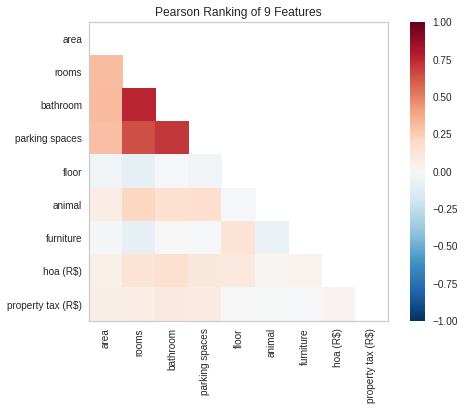

In [32]:
# Yellowbrick
from yellowbrick.features import Rank2D

# Definir o metodo

correlacao = Rank2D(algoritmo = 'pearson')

# Fitar função
correlacao.fit(caracteristicas, previsor)
correlacao.transform(caracteristicas)
correlacao.show()

### Separação dos dados

In [33]:
from sklearn.model_selection import train_test_split

# Divisão dos dados

x_treino, x_teste, y_treino, y_teste = train_test_split(caracteristicas,
                                                        previsor,
                                                        test_size=0.2,
                                                        random_state=10   
                                                        )

In [34]:
# Features mais relevantes
from sklearn.feature_selection import mutual_info_regression  # Analisa a dependencia entre duas variaveis. Se for = 0 -> sem dependencia
from sklearn.feature_selection import SelectKBest

# Seleção de features

def selecao_features(x_treino, y_treino):

  # Configurar para selecionar as features
  selecao = SelectKBest(score_func=mutual_info_regression, k='all')

  # Fitar o aprendizado
  selecao.fit(x_treino, y_treino)

  return selecao


In [35]:
# Aplicar função
scores = selecao_features(x_treino, y_treino)

# Analisar
for posicao, scores in enumerate(scores.scores_):
  print(f'{x_treino.columns[posicao]}:{scores}')

area:0.06260790317408649
rooms:0.25366443486952006
bathroom:0.32625772220604876
parking spaces:0.23678399035360664
floor:0.019947439049535998
animal:0.026819078077142233
furniture:0.04465394405145151
hoa (R$):0.05721634346681537
property tax (R$):0.15459294975814464


Maior relação com o valor :

      rooms:0.2607177853961966
      bathroom:0.3152442201431662
      parking spaces:0.2347976210673428
      property tax (R$):0.15878667604044594




Como todas as variáveis tem uma correlação, todas serão utilizadas para construir o modelo.

# **Construção do Modelo**

Random Forest Regressor - cria diversas árvores (floresta) e no final escolhe a árvore que teve melhor resultado com os dados.



In [36]:
# Modelo Random Forest Regresson
from sklearn.ensemble import RandomForestRegressor

# Instanciar
modelo_floresta = RandomForestRegressor(max_depth=5) # parametro configurado = 5 para evitar overfitting

# Fitar
modelo_floresta.fit(x_treino, y_treino)



RandomForestRegressor(max_depth=5)

In [37]:
# Avaliar a performance do modelo
previsoes = modelo_floresta.predict(x_teste)

# Função para avaliar
# mean_squared_error - o quanto o modelo está errando na média
# r2_score - o quanto o modelo se explica (0 até 1)
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

rmse = sqrt(mean_squared_error(y_teste, previsoes))
score = r2_score(y_teste, previsoes)

print(" RMSE:", rmse, '\n', "Score:", score)

 RMSE: 2457.2988690367665 
 Score: 0.5629736332232911


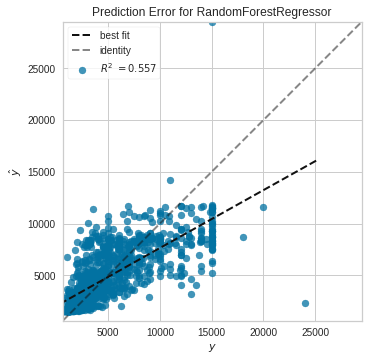

In [38]:
# Avaliando Yellowbrick
from yellowbrick.regressor import PredictionError

# Instanciar
modelo = RandomForestRegressor(max_depth=5)
erro_modelo = PredictionError(modelo)

# Fitar
erro_modelo.fit(x_treino, y_treino)
erro_modelo.score(x_teste, y_teste)
erro_modelo.show()

# Exportação

In [39]:
import joblib

#Função
joblib.dump(modelo_floresta, "Modelo_Floresta_Aleatoria_v1.pkl")

['Modelo_Floresta_Aleatoria_v1.pkl']

In [40]:
# Testando o modelo treinado
funcao_modelo_carregado = joblib.load('drive/MyDrive/curso_udemy_ml/Modelo_Floresta_Aleatoria_v1.pkl')

In [41]:
# Testando
funcao_modelo_carregado.predict(x_teste.head(1).values)

array([1526.46922098])

In [42]:
# Testando
funcao_modelo_carregado.predict(x_teste)

array([1526.46922098, 9050.11293686, 7883.49718887, ..., 2090.88105135,
       6255.43563079, 3127.54220344])

In [43]:
x_teste.head().values

array([[  25,    1,    1,    0,    0,    0,    0,    0,   84],
       [ 480,    4,    5,    3,    0,    1,    0,    0,  742],
       [ 226,    3,    4,    3,    6,    1,    0, 2200, 1209],
       [ 100,    2,    4,    2,   12,    0,    1,  885,  330],
       [  35,    1,    1,    1,   14,    0,    0, 1700,  275]])

In [44]:
y_teste.head().values

array([ 1000, 15000,  6900,  3000,  2000])